In [6]:
import streamlit as st
import pandas as pd
from configparser import ConfigParser
import alpaca_trade_api as tradeapi


config = ConfigParser()
config.read('config/credential.ini')
api = tradeapi.REST(config['ALPACA']['API_KEY'],config['ALPACA']['API_SECRET'],api_version='v2')
barset = api.get_barset('AAPL', 'day', limit=5).df

In [8]:
aapl_bars = barset['AAPL']
aapl_bars

,open,high,low,close,volume
time,,,,,
2020-08-27 00:00:00-04:00,508.57,509.94,495.33,500.04,36319905
2020-08-28 00:00:00-04:00,504.05,505.77,498.31,498.83,38201316
2020-08-31 00:00:00-04:00,127.58,131.00,126.00,128.85,199136542
2020-09-01 00:00:00-04:00,132.76,134.80,130.53,134.20,138233208
2020-09-02 00:00:00-04:00,137.59,137.98,127.00,131.22,184800962


In [11]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
# The digits dataset
digits = datasets.load_digits()

In [21]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
# We learn the digits on the first half of the digits

classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

In [22]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)
predicted

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 5, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

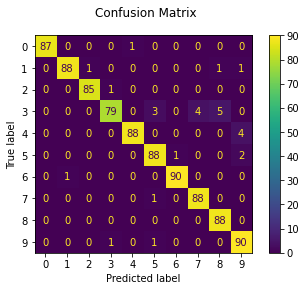

In [23]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [24]:
import altair as alt
from vega_datasets import data

source = data.wheat()

alt.Chart(source).mark_bar().encode(
    x='year:O',
    y="wheat:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.year == 1810,  # If the year is 1810 this test returns True,
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
).properties(width=600)

alt.Chart(...)

In [25]:
source

,year,wheat,wages
0,1565,41.0,5.00
1,1570,45.0,5.05
2,1575,42.0,5.08
3,1580,49.0,5.12
4,1585,41.5,5.15
5,1590,47.0,5.25
6,1595,64.0,5.54
7,1600,27.0,5.61
8,1605,33.0,5.69
9,1610,32.0,5.78


In [34]:
import streamlit as st
from streamlit_drawable_canvas import st_canvas
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statistics import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import altair as alt
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt



digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

svmclf = svm.SVC(gamma=0.001).fit(X_train, y_train)
logisticclf = LogisticRegression(solver='newton-cg',random_state=0,max_iter=1000).fit(X_train, y_train)
decisionclf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
randomclf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train)
nbayeclf = GaussianNB().fit(X_train,y_train)
xgbclf = xgb.XGBClassifier(objective="multi:softprob", random_state=42).fit(X_train,y_train)

clfs = {'svmclf': svmclf, 'logisticclf': logisticclf,'decisionclf':decisionclf,'randomclf':randomclf, 'nbayeclf':nbayeclf,'xgbclf':xgbclf}
clfmetrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1-score': []}
measures = {'accuracy': metrics.accuracy_score, 'precision':  metrics.precision_score, 'recall':  metrics.recall_score, 'f1-score':  metrics.f1_score}
for clf in clfs.keys():
    for clfmetric in clfmetrics.keys():
        y_pred = clfs[clf].predict(X_test)
        if clfmetric == "accuracy":
            val = measures[clfmetric](y_test, y_pred)
        else:
            val = measures[clfmetric](y_test, y_pred, average='macro')
        fval = val if type(val) is not list else mean(val)
        clfmetrics[clfmetric].append(round(fval*100,3))

mnistAlgo = ['SVM','Logistic Regression','Decision Tree','Random Forest','Naive Bayes','XG Boost']
source = pd.DataFrame()
source['Algo'] =  mnistAlgo
source['Accuracy'] = clfmetrics['accuracy']
source.head()



    # mnistAlgo = ['Logistic Regression','Naive Bayes','SVM','Decision Tree','Random Forest','XG Boost']
    # menu_selection = st.sidebar.selectbox("Algorithm",mnistAlgo)
    # stroke_width = st.sidebar.slider("Stroke width: ", 1, 10, 1)
    # # Create a canvas component
    # canvas_result = st_canvas(
    #     fill_color="rgba(255, 165, 0, 0.3)",  # Fixed fill color with some opacity
    #     stroke_width=stroke_width,
    #     stroke_color="#000000",
    #     background_color="#F7F6F6",
    #     background_image=None,
    #     height=150,
    #     drawing_mode="freedraw",
    #     key="canvas")
    # if canvas_result.image_data is not None:
    #     print(type(canvas_result))
    #
    # mnist = MNIST('../dataset/MNIST')
    # x_train, y_train = mnist.load_training()  # 60000 samples
    # x_test, y_test = mnist.load_testing()  # 10000 samples
    # print(x_train.head())



    

,Algo,Accuracy
0,SVM,96.885
1,Logistic Regression,93.103
2,Decision Tree,75.751
3,Random Forest,75.306
4,Naive Bayes,80.756


In [36]:
alt.Chart(source).mark_bar().encode(
x='Algo',
y="Accuracy",
# The highlight will be set on the result of a conditional statement
color=alt.condition(
alt.datum.Algo == "SVM",  # If the year is 1810 this test returns True,
alt.value('orange'),  # which sets the bar orange.
alt.value('steelblue')  # And if it's not true it sets the bar steelblue.
)
).properties(width=600)

alt.Chart(...)

In [37]:
clfmetrics

{'accuracy': [96.885, 93.103, 75.751, 75.306, 80.756, 89.099],
 'precision': [96.97, 93.481, 77.159, 78.592, 82.272, 89.392],
 'recall': [96.918, 93.13, 75.765, 75.289, 80.831, 89.134],
 'f1-score': [96.887, 93.166, 76.023, 73.414, 81.046, 89.135]}

In [41]:
list(clfmetrics.keys())

['accuracy', 'precision', 'recall', 'f1-score']

In [42]:
import altair as alt
from vega_datasets import data
iris = data.iris.url

alt.Chart(iris).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:N'
).properties(
    width=200,
    height=200
).repeat(
    row=['petalLength', 'petalWidth'],
    column=['sepalLength', 'sepalwidth']
).interactive()

alt.RepeatChart(...)

In [44]:
iris

'https://vega.github.io/vega-datasets/data/iris.json'